<img src="Images/aiwithai.png" width="100%">

In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3,  
                  random_state=0)
X

array([[ 3.15492712,  1.55292739],
       [ 0.08848433,  2.32299086],
       [ 0.62835793,  4.4601363 ],
       [ 0.08080352,  4.69068983],
       [ 3.18190344, -0.18226785],
       [ 2.20656076,  5.50616718],
       [ 2.50904929,  5.7731461 ],
       [ 2.69539905, -0.71929238],
       [-2.71576327,  2.41106591],
       [ 2.46452227,  6.1996765 ],
       [ 4.21850347,  2.23419161],
       [ 0.77701268,  1.85786644],
       [-2.16434104,  2.52061045],
       [ 0.4666179 ,  3.86571303],
       [-0.65392827,  4.76656958],
       [-2.47135027,  2.50783257],
       [-1.42917905,  3.50083594],
       [ 1.68608568,  0.65828448],
       [-1.65978459,  2.62009138],
       [ 2.0159847 , -0.27042984],
       [ 0.30380963,  3.94423417],
       [ 2.82705807,  1.72116781],
       [ 1.28933778,  3.44969159],
       [ 1.12031365,  5.75806083],
       [-1.00583914,  2.34209429],
       [ 2.57854418,  0.72611733],
       [ 2.66934689,  1.81987033],
       [ 1.44193252,  2.76754364],
       [-3.55758848,

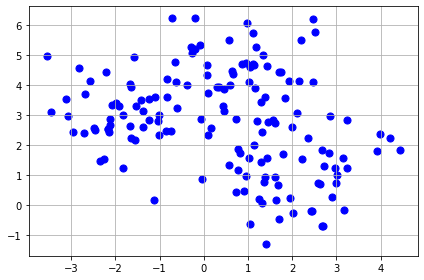

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
from sklearn.cluster import KMeans


In [12]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=100, 
            max_iter=1000)
y_km = km.fit_predict(X)

In [13]:
y_km

array([0, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0])

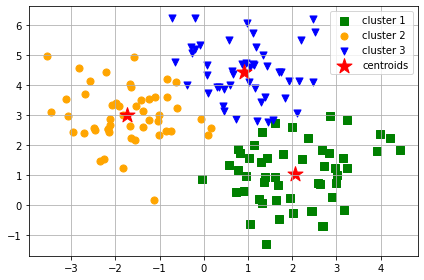

In [14]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='green',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [8]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 174.11


## Using the elbow method to find the optimal number of clusters

C:\Users\asifi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


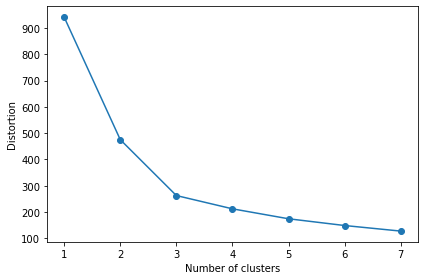

In [9]:
distortions = []
for i in range(1, 8):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## Quantifying the quality of clustering via silhouette plots

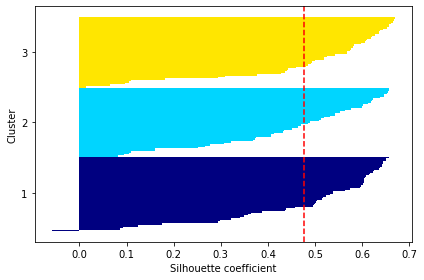

In [10]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

In [11]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 262.72
